In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv("../data/raw/data.csv")


In [3]:
# Shape of the dataset
print("Shape:", df.shape)

# Preview the dataset
df.head()

Shape: (95662, 16)


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [4]:
# Data types and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [5]:
# Summary statistics for numerical features
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


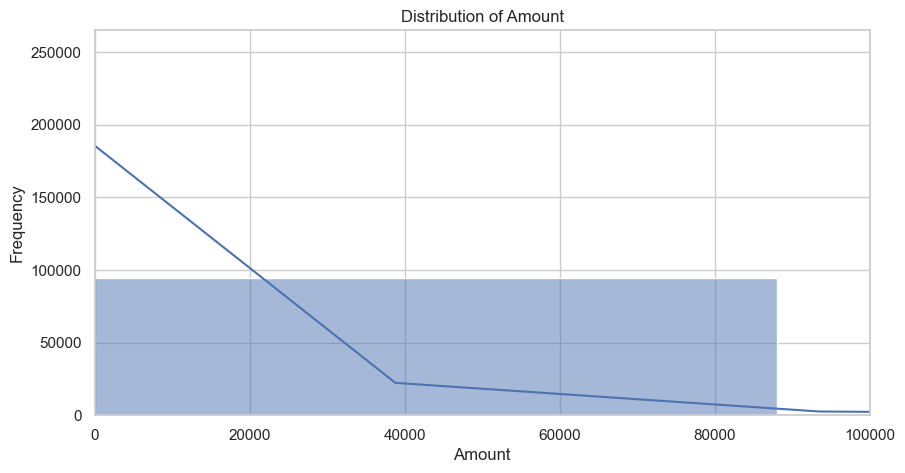

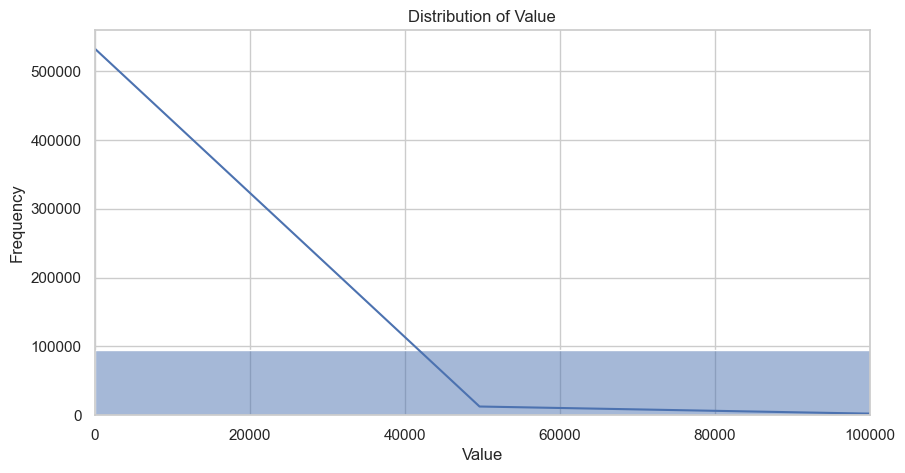

In [6]:
#Distribution of numerical features
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['Amount', 'Value']

# Loop through each numerical column
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.xlim(0, 100_000)  # adjust this based on your actual data distribution
    plt.grid(True)
    plt.show()


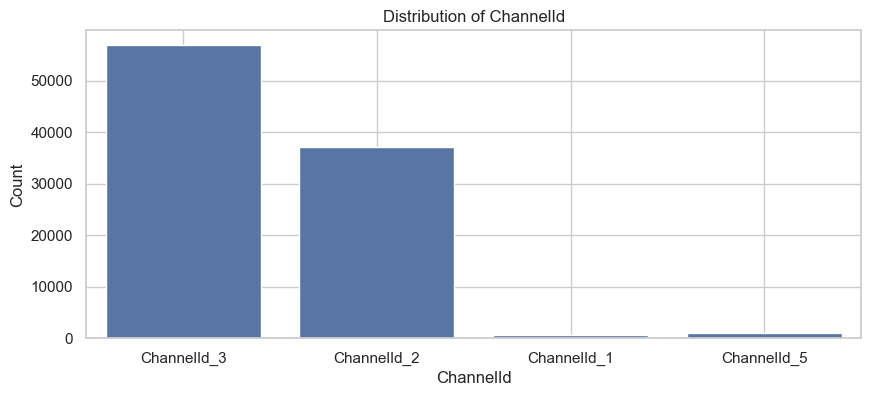

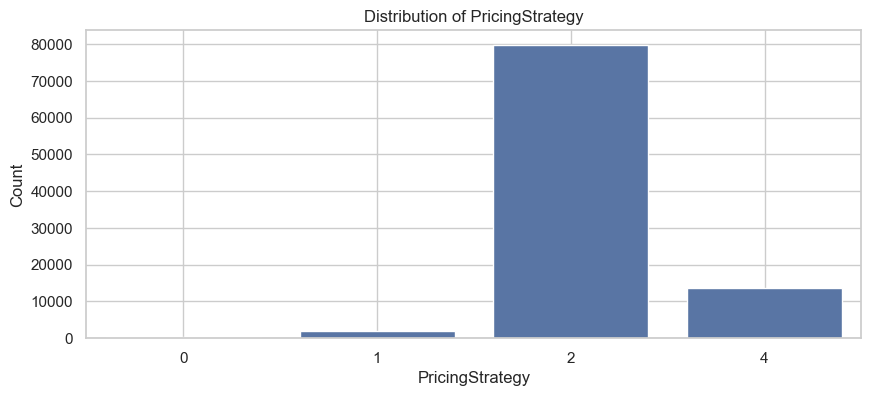

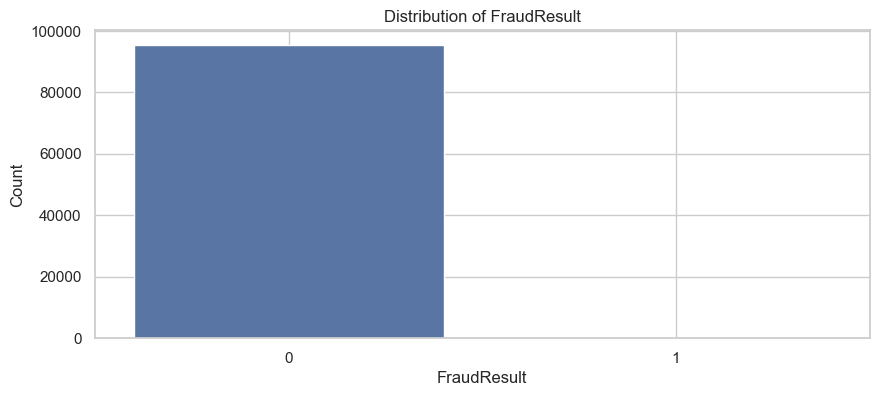

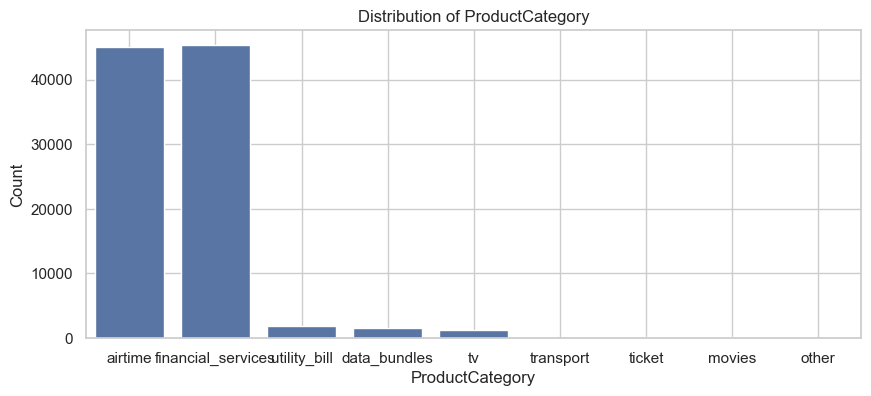

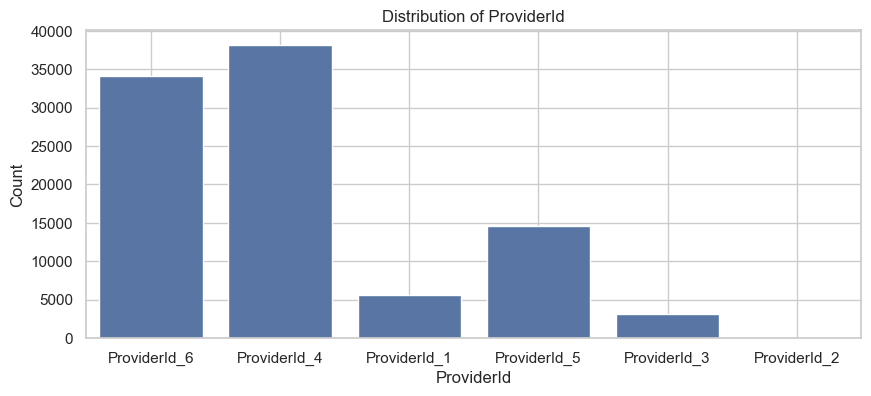

In [8]:
#Distribution of categorical variables
categorical_cols = ['ChannelId', 'PricingStrategy', 'FraudResult', 'ProductCategory','ProviderId']

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()


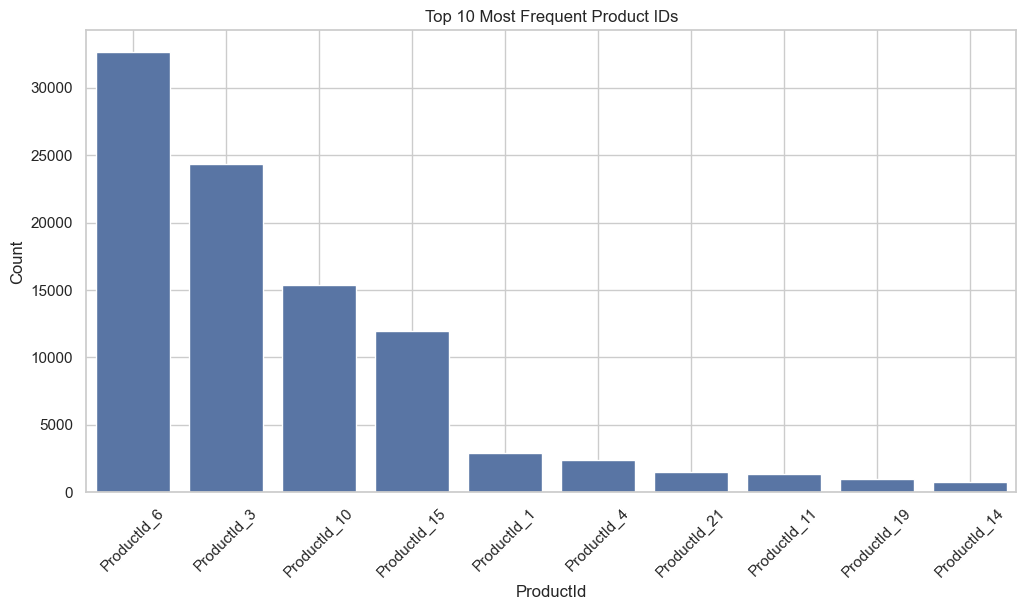

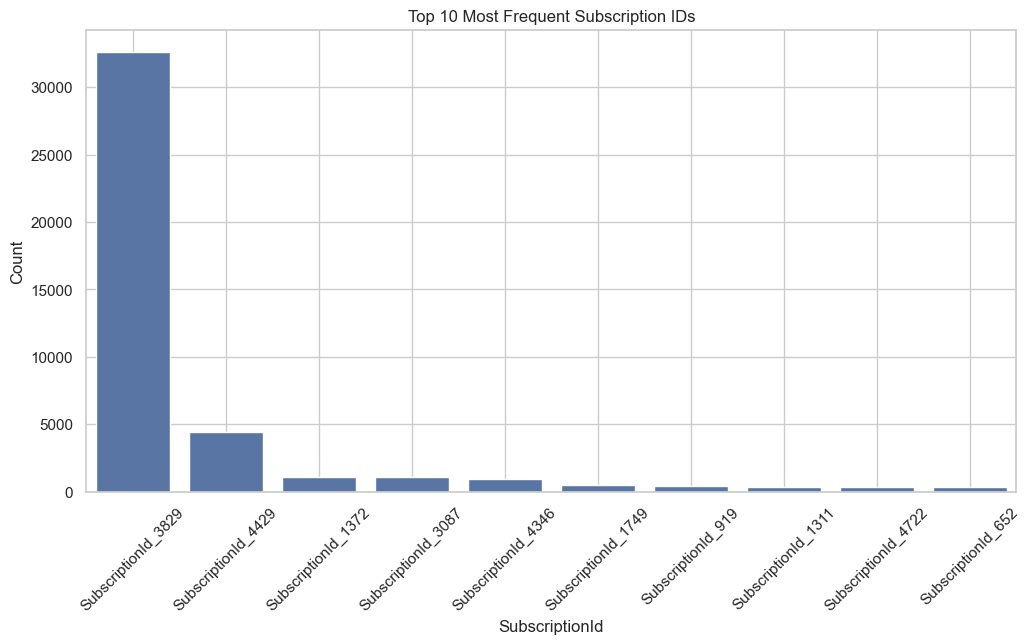

In [9]:
# Top 10 most frequent ProductIds
top_products = df['ProductId'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index.astype(str), y=top_products.values)
plt.title('Top 10 Most Frequent Product IDs')
plt.xlabel('ProductId')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

top_subscriptions = df['SubscriptionId'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_subscriptions.index.astype(str), y=top_subscriptions.values)
plt.title('Top 10 Most Frequent Subscription IDs')
plt.xlabel('SubscriptionId')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



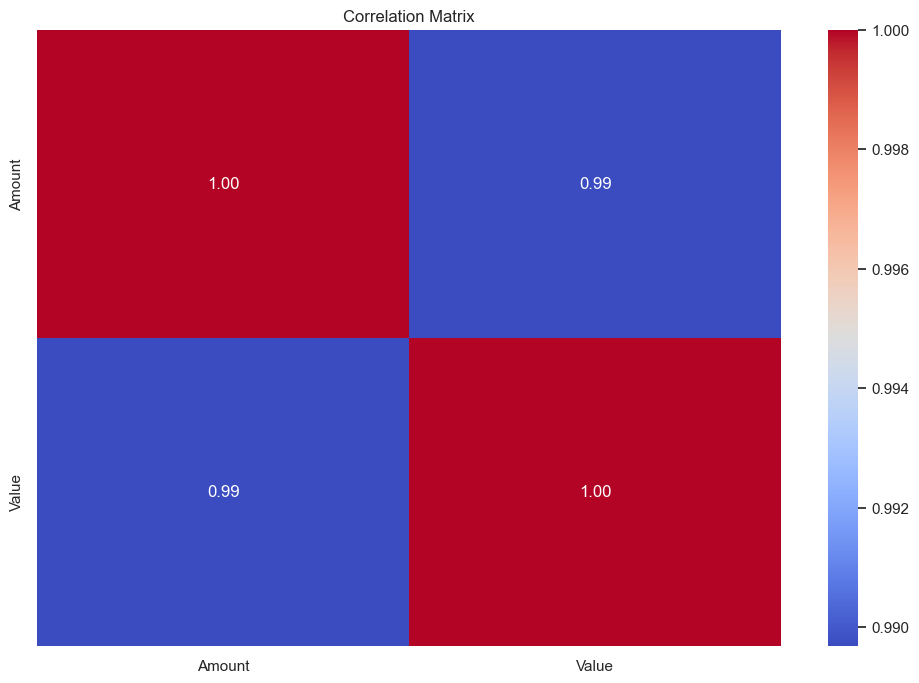

In [10]:
# Correlation analysis

# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [11]:
# Count missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

# Plot missing values
if not missing.empty:
    plt.figure(figsize=(10, 5))
    missing.plot(kind="bar")
    plt.title("Missing Values by Feature")
    plt.ylabel("Count")
    plt.show()
else:
    print("✅ No missing values found.")


✅ No missing values found.


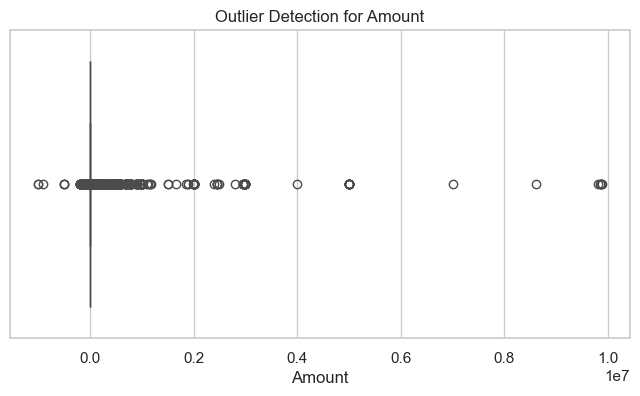

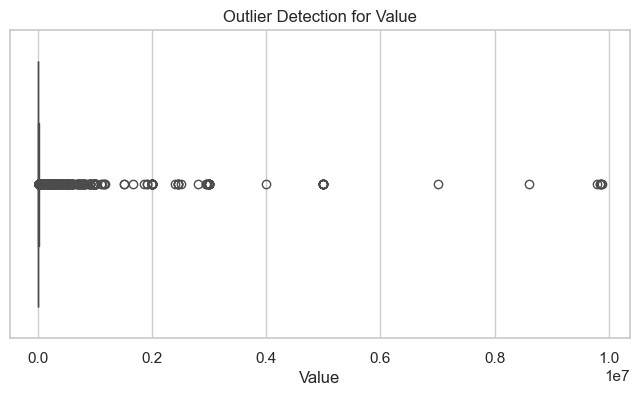

In [12]:
# Boxplots for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Detection for {col}")
    plt.show()


### Top 3–5 Insights

1. **Highly Skewed Transaction Amounts**: `Amount` has a strong positive skew, indicating that most transactions are low-value, with a few very high-value transactions.
2. **Channel Usage**: Most users interact with the platform through channel_3 and channel_3, with very few using channel_1 or channel_5.
3. **Product Category Distribution**: Certain product categories (e.g., "Airtime") dominate the dataset, suggesting a few services are much more commonly used.
4. **Strong Correlation**: There is a strong correlation between `Amount` and `Value` (expected, since Value is absolute of Amount), and possibly with fraud patterns.
5. **Presence of Outliers**: Several outliers in `Amount` and `TransactionStartTime` may influence model performance and need special handling.
